Import all dependencies

In [44]:
from typing import Dict
from matplotlib import pyplot as plt
import numpy as np
import cv2

Helper functions for displaying images

In [45]:
def show_image(img: np.ndarray, window_name: str) -> None:
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(window_name)
    plt.show()

def show_subplot(named_imgs: Dict[str, np.ndarray], max_size=32) -> None:
    f, axarr = plt.subplots(1, len(named_imgs))
    f.set_figheight(max_size)
    f.set_figwidth(max_size)

    for idx, (name, img) in enumerate(named_imgs.items()):
        if (img.ndim == 2):
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        axarr[idx].set_title(name)
        axarr[idx].imshow(img)

Default kernels

In [46]:
kernel_emboss     = np.array([[-2, -1,  0], 
                              [-1,  1,  1], 
                              [ 0,  1,  2]], np.float32)

kernel_sobel_left = np.array([[ 1,  0, -1], 
                              [ 2,  0, -2], 
                              [ 1,  0, -1]], np.float32)

kernel_sobel_top  = np.array([[ 1,  2,  1], 
                              [ 0,  0,  0], 
                              [-1, -2,  -1]], np.float32)

kernel_ridge      = np.array([[-1, -1, -1], 
                              [-1,  8, -1], 
                              [-1, -1, -1]], np.float32)

kernel_sharpen    = np.array([[ 0, -1,  0], 
                              [-1,  5, -1], 
                              [ 0, -1,  0]], np.float32)

kernel_blur_3     = np.array([[ 1,  2,  1], 
                              [ 2,  4,  2], 
                              [ 1,  2,  1]], np.float32)
kernel_blur_3 /= kernel_blur_3.sum()

kernel_blur_5     = np.array([[1,  4,  6,  4,  1], 
                              [4, 16, 24, 16,  4], 
                              [6, 24, 36, 24,  6],
                              [4, 16, 24, 16,  4],
                              [1,  4,  6,  4,  1]], np.float32)
kernel_blur_5 /= kernel_blur_5.sum()

Load the base image

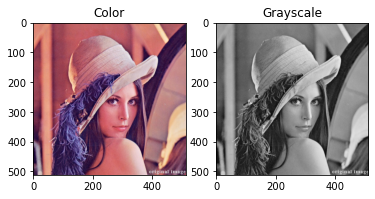

In [47]:
raw_img = cv2.imread('imgs/lena_color.jpg')
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
bw_img = cv2.cvtColor(raw_img, cv2.COLOR_RGB2GRAY)

show_subplot({"Color": raw_img, "Grayscale": bw_img}, 6)